## Import CSV   

In [1]:
import pandas as pd

In [2]:
import os

# Remove any existing backend configuration that might be causing issues
os.environ.pop('MPLBACKEND', None)

# Import matplotlib and set a safe backend
import matplotlib
#matplotlib.use('agg')  # Use 'agg' backend which does not require a graphical interface

import matplotlib.pyplot as plt


In [3]:
# Load the data
data = pd.read_csv('Community_Crime_and_Disorder_Statistics__2012-2019_.csv')
print(data.head())

      Sector       Community Name Group Category                   Category  \
0  NORTHEAST        SOUTH AIRWAYS          Crime           Theft OF Vehicle   
1       WEST         RUTLAND PARK       Disorder            Social Disorder   
2      SOUTH             DEER RUN          Crime  Residential Break & Enter   
3       WEST         RUTLAND PARK          Crime     Assault (Non-domestic)   
4      SOUTH  FAIRVIEW INDUSTRIAL          Crime   Commercial Break & Enter   

   Crime Count  Resident Count     Date  Year Month  \
0            3               0  2019/12  2019   DEC   
1           10            2263  2019/12  2019   DEC   
2            2            5065  2019/12  2019   DEC   
3            1            2263  2019/12  2019   DEC   
4            6               0  2019/12  2019   DEC   

                                                  ID  \
0          2019-DEC-SOUTH AIRWAYS-Theft OF Vehicle-3   
1           2019-DEC-RUTLAND PARK-Social Disorder-10   
2      2019-DEC-DEER RUN-R

In [4]:
print(data['Date'].dtype)

object


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114848 entries, 0 to 114847
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Sector                  114848 non-null  object
 1   Community Name          114848 non-null  object
 2   Group Category          114848 non-null  object
 3   Category                114848 non-null  object
 4   Crime Count             114848 non-null  int64 
 5   Resident Count          114848 non-null  int64 
 6   Date                    114848 non-null  object
 7   Year                    114848 non-null  int64 
 8   Month                   114848 non-null  object
 9   ID                      114848 non-null  object
 10  Community Center Point  114848 non-null  object
dtypes: int64(3), object(8)
memory usage: 9.6+ MB


In [6]:
data.describe()

,Crime Count,Resident Count,Year
count,114848.000000,114848.00000,114848.000000
mean,8.231018,5980.42854,2015.668196
std,26.171051,5127.65733,2.278545
min,1.000000,0.00000,2012.000000
25%,1.000000,1895.00000,2014.000000
50%,2.000000,5335.00000,2016.000000
75%,6.000000,8885.00000,2018.000000
max,801.000000,25990.00000,2019.000000


In [7]:
data['Date'] = pd.to_datetime(data['Date'])

# Verify the data type again after conversion

print(data['Date'].dtype)

datetime64[ns]


C:\Users\aless\AppData\Local\Temp\ipykernel_11740\1061208520.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'])


In [8]:
# Display the first few rows of the 'Date' column to verify the format
print(data['Date'].head())

0   2019-12-01
1   2019-12-01
2   2019-12-01
3   2019-12-01
4   2019-12-01
Name: Date, dtype: datetime64[ns]


In [9]:
# Select Northeast
data = data[data['Sector'] == "NORTHEAST"]
print(data.head())

       Sector Community Name Group Category           Category  Crime Count  \
0   NORTHEAST  SOUTH AIRWAYS          Crime   Theft OF Vehicle            3   
32  NORTHEAST       SUNRIDGE       Disorder  Physical Disorder            7   
37  NORTHEAST  SKYVIEW RANCH          Crime     Street Robbery            2   
38  NORTHEAST     MARTINDALE       Disorder    Social Disorder           43   
40  NORTHEAST       TARADALE          Crime     Street Robbery            1   

    Resident Count       Date  Year Month  \
0                0 2019-12-01  2019   DEC   
32              11 2019-12-01  2019   DEC   
37           11707 2019-12-01  2019   DEC   
38           14245 2019-12-01  2019   DEC   
40           19026 2019-12-01  2019   DEC   

                                           ID  \
0   2019-DEC-SOUTH AIRWAYS-Theft OF Vehicle-3   
32      2019-DEC-SUNRIDGE-Physical Disorder-7   
37    2019-DEC-SKYVIEW RANCH-Street Robbery-2   
38     2019-DEC-MARTINDALE-Social Disorder-43   
40       

In [10]:
# Add 'Year' and 'Month' columns to facilitate seasonal plotting
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month

# Aggregate the data by year and month to sum the crime count
data_month = data.groupby(['Year', 'Month']).agg({'Crime Count': 'sum'}).reset_index()


In [11]:
# Set the 'Date' column as the index of the DataFrame
data.set_index('Date', inplace=True) # essential for time series

In [12]:
data.sort_values(by='Date')
print(data.head())

               Sector Community Name Group Category           Category  \
Date                                                                     
2019-12-01  NORTHEAST  SOUTH AIRWAYS          Crime   Theft OF Vehicle   
2019-12-01  NORTHEAST       SUNRIDGE       Disorder  Physical Disorder   
2019-12-01  NORTHEAST  SKYVIEW RANCH          Crime     Street Robbery   
2019-12-01  NORTHEAST     MARTINDALE       Disorder    Social Disorder   
2019-12-01  NORTHEAST       TARADALE          Crime     Street Robbery   

            Crime Count  Resident Count  Year  Month  \
Date                                                   
2019-12-01            3               0  2019     12   
2019-12-01            7              11  2019     12   
2019-12-01            2           11707  2019     12   
2019-12-01           43           14245  2019     12   
2019-12-01            1           19026  2019     12   

                                                   ID  \
Date                           

In [13]:
data.head()

,Sector,Community Name,Group Category,Category,Crime Count,Resident Count,Year,Month,ID,Community Center Point
Date,,,,,,,,,,
2019-12-01,NORTHEAST,SOUTH AIRWAYS,Crime,Theft OF Vehicle,3,0,2019,12,2019-DEC-SOUTH AIRWAYS-Theft OF Vehicle-3,"(51.0742191886852, -114.0052956757618)"
2019-12-01,NORTHEAST,SUNRIDGE,Disorder,Physical Disorder,7,11,2019,12,2019-DEC-SUNRIDGE-Physical Disorder-7,"(51.074221599518935, -113.99170056999279)"
2019-12-01,NORTHEAST,SKYVIEW RANCH,Crime,Street Robbery,2,11707,2019,12,2019-DEC-SKYVIEW RANCH-Street Robbery-2,"(51.15612673497898, -113.95837456074634)"
2019-12-01,NORTHEAST,MARTINDALE,Disorder,Social Disorder,43,14245,2019,12,2019-DEC-MARTINDALE-Social Disorder-43,"(51.11791372594209, -113.9583871171306)"
2019-12-01,NORTHEAST,TARADALE,Crime,Street Robbery,1,19026,2019,12,2019-DEC-TARADALE-Street Robbery-1,"(51.11794016304313, -113.93400207797254)"


In [14]:
data['Month'].describe()

count    18843.000000
mean         6.522316
std          3.434709
min          1.000000
25%          4.000000
50%          7.000000
75%         10.000000
max         12.000000
Name: Month, dtype: float64

In [15]:
# Agregate crime count by date

data_count = data.groupby(by='Date')['Crime Count'].sum()
data_count.head()

Date
2012-01-01    1209
2012-02-01    1296
2012-03-01    1512
2012-04-01    1489
2012-05-01    1488
Name: Crime Count, dtype: int64

In [16]:
# minimum date
mindate = data_count.index.min()
mindate


Timestamp('2012-01-01 00:00:00')

In [17]:
maxdate = data_count.index.max()

In [18]:
# turning data into time series object
df = pd.DataFrame(data_count)
df

,Crime Count
Date,
2012-01-01,1209
2012-02-01,1296
2012-03-01,1512
2012-04-01,1489
2012-05-01,1488
...,...
2019-08-01,2124
2019-09-01,2035
2019-10-01,1911


In [19]:
ts_data = df['Crime Count']
ts_data

Date
2012-01-01    1209
2012-02-01    1296
2012-03-01    1512
2012-04-01    1489
2012-05-01    1488
              ... 
2019-08-01    2124
2019-09-01    2035
2019-10-01    1911
2019-11-01    1659
2019-12-01    1644
Name: Crime Count, Length: 96, dtype: int64

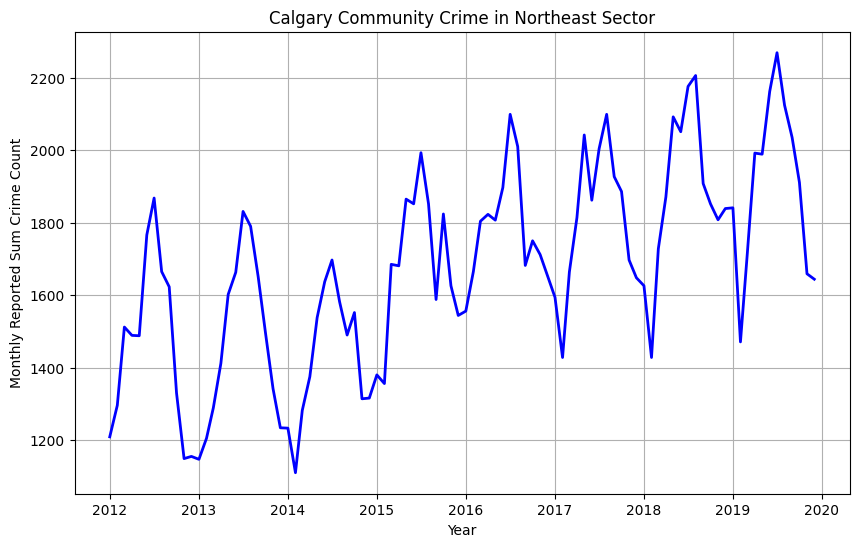

In [20]:
# Create the time series plot - df

%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Crime Count'], marker='', color='b', linewidth=2)
plt.title("Calgary Community Crime in Northeast Sector")
plt.xlabel("Year")
plt.ylabel("Monthly Reported Sum Crime Count")
plt.grid(True)
plt.show()

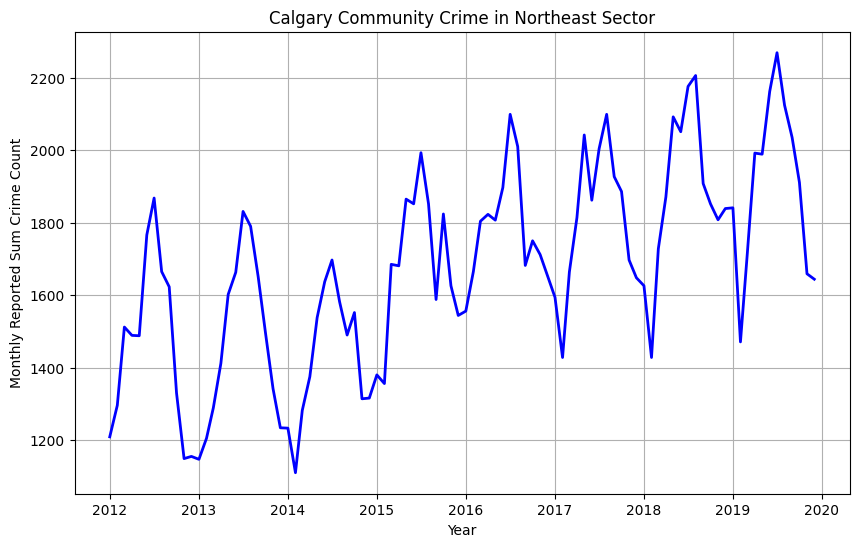

In [21]:
# Create the time series plot - ts_data

%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(ts_data.index, df['Crime Count'], marker='', color='b', linewidth=2)
plt.title("Calgary Community Crime in Northeast Sector")
plt.xlabel("Year")
plt.ylabel("Monthly Reported Sum Crime Count")
plt.grid(True)
plt.show()

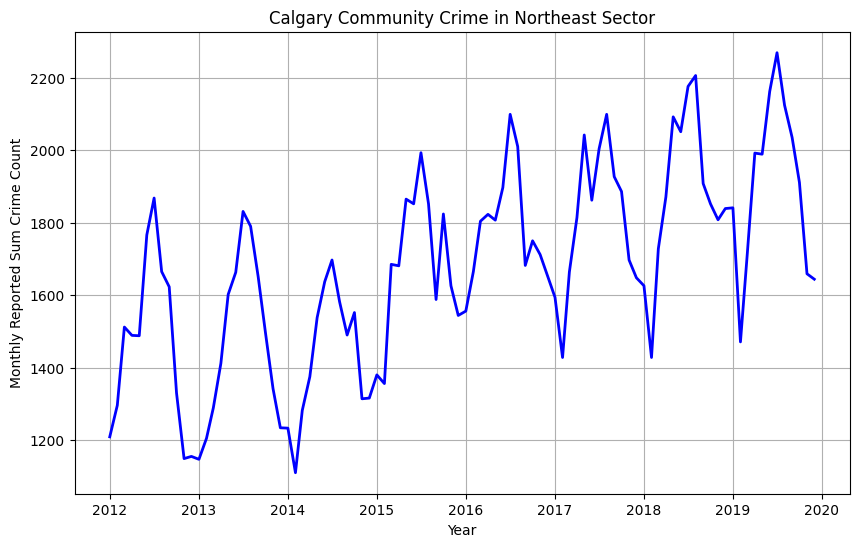

In [22]:
# Create the time series plot - data

%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(data_count.index, df['Crime Count'], marker='', color='b', linewidth=2)
plt.title("Calgary Community Crime in Northeast Sector")
plt.xlabel("Year")
plt.ylabel("Monthly Reported Sum Crime Count")
plt.grid(True)
plt.show()

In [23]:
import seaborn as sns

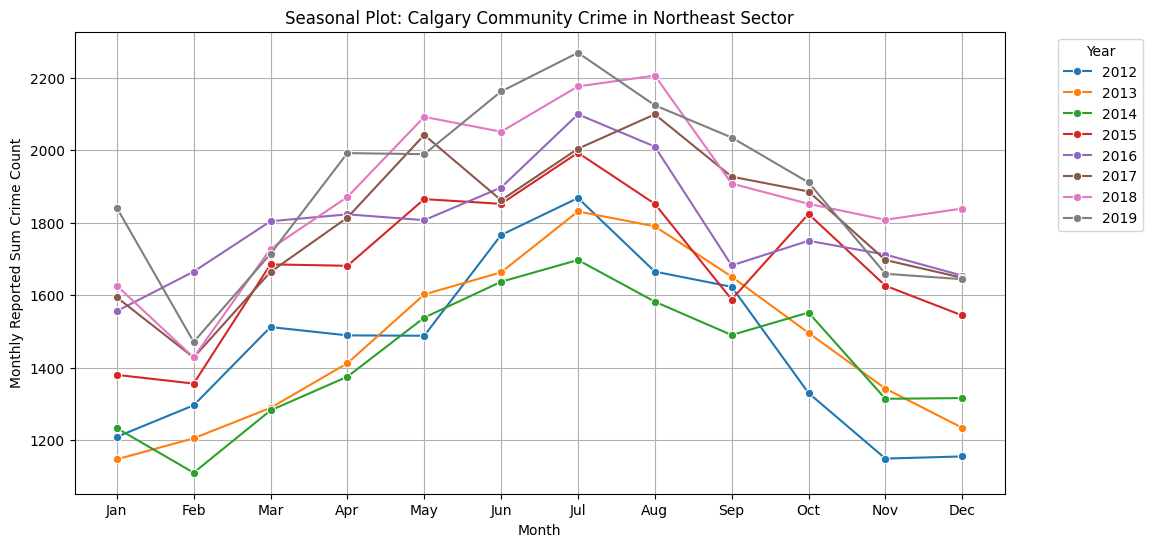

In [24]:
# Create the seasonal plot
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=data_month, x='Month', y='Crime Count', hue='Year', palette='tab10', marker='o')

# Adjust the month labels to appear as abbreviated names
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(ticks=range(1, 13), labels=month_names)

# Add title and labels to axes
plt.title("Seasonal Plot: Calgary Community Crime in Northeast Sector")
plt.xlabel("Month")
plt.ylabel("Monthly Reported Sum Crime Count")

# Add legend and show the plot
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


# Testing models

## Importing packages and setting training data

In [25]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing
from statsmodels.tsa.api import seasonal_decompose
import numpy as np

In [26]:
# Aggregate the data by month and sum the crime count
data_monthly = data.resample('M').sum()

In [27]:
# Aggregate the data by month and sum the crime count
data_monthly = data.resample('M').sum()

In [28]:
# Split data into training and test sets
train = data_monthly[:'2017-12-31']
test = data_monthly['2018-01-01':]

## Setting Models

In [29]:
# Simple Forecasting Functions
def forecast_mean(train, steps):
    mean_forecast = np.full(steps, train['Crime Count'].mean())
    return mean_forecast

def forecast_naive(train, steps):
    naive_forecast = np.full(steps, train['Crime Count'].iloc[-1])
    return naive_forecast

def forecast_seasonal_naive(train, steps):
    seasonal_naive_forecast = np.tile(train['Crime Count'].iloc[-12:], int(np.ceil(steps / 12)))[:steps]
    return seasonal_naive_forecast


In [30]:
# Forecast Function using Linear Regression with Trend and Seasonality
from statsmodels.tsa.deterministic import DeterministicProcess
from statsmodels.api import OLS

def forecast_linear_trend_seasonality(train, steps):
    # Extract date index and create trend and seasonality components
    dates = train.index
    dp = DeterministicProcess(index=dates,
                              constant=True,  # Adds intercept
                              order=1,        # Linear trend (order 1)
                              seasonal=True,  # Adds seasonal effects
                              drop=True)      # Removes the original date column
    X = dp.in_sample()  # In-sample data
    y = train['Crime Count']
    
    # Fit the linear regression model
    model = OLS(y, X).fit()
    
    # Generate forecasts
    X_fore = dp.out_of_sample(steps=steps)  # Out-of-sample data for prediction
    forecast = model.predict(X_fore)
    
    return forecast


In [31]:
# Forecasts
steps = 24  # Number of months ahead (h = 24 months)
mean_forecast = forecast_mean(train, steps)
naive_forecast = forecast_naive(train, steps)
seasonal_naive_forecast = forecast_seasonal_naive(train, steps)
linear_trend_seasonal_forecast = forecast_linear_trend_seasonality(train, steps)


## Evaluating Models

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# Function to calculate evaluation metrics
def evaluate_forecasts(test, *forecasts):
    metrics = ['MAE', 'RMSE', 'MAPE']
    results = {}

    for i, forecast in enumerate(forecasts):
        mae = mean_absolute_error(test, forecast)
        rmse = np.sqrt(mean_squared_error(test, forecast))
        mape = mean_absolute_percentage_error(test, forecast)
        results[f'Model {i+1}'] = [mae, rmse, mape]

    results_df = pd.DataFrame(results, index=metrics)
    return results_df

# Calculate evaluation metrics for each forecast model
results = evaluate_forecasts(test['Crime Count'], 
                             mean_forecast, 
                             naive_forecast, 
                             seasonal_naive_forecast, 
                             linear_trend_seasonal_forecast)

# Display the evaluation metrics results
print("Forecast Models Evaluation:")
print(results)


Forecast Models Evaluation:
         Model 1     Model 2     Model 3     Model 4
MAE   310.703704  278.750000   98.416667   87.697024
RMSE  362.159921  330.973438  131.083943  111.819129
MAPE    0.155781    0.139849    0.049656    0.050478


Forecast Models Evaluation:
         Model 1     Model 2     Model 3     Model 4
MAE   310.703704  278.750000   98.416667   87.697024
RMSE  362.159921  330.973438  131.083943  111.819129
MAPE    0.155781    0.139849    0.049656    0.050478


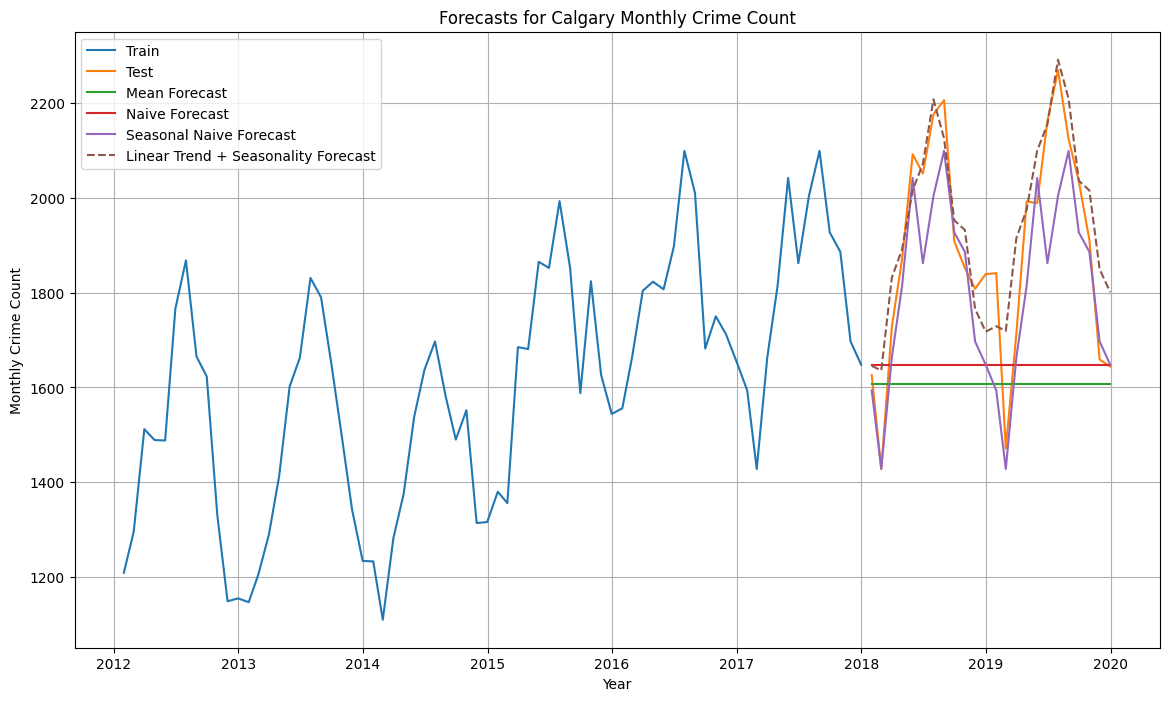

In [33]:
# Evaluate forecasts
results = evaluate_forecasts(test['Crime Count'], mean_forecast, naive_forecast, seasonal_naive_forecast, linear_trend_seasonal_forecast)

# Display the results
print("Forecast Models Evaluation:")
print(results)

# Display the forecasts and actual data
plt.figure(figsize=(14, 8))
plt.plot(train.index, train['Crime Count'], label='Train')
plt.plot(test.index, test['Crime Count'], label='Test')
plt.plot(test.index, mean_forecast, label='Mean Forecast')
plt.plot(test.index, naive_forecast, label='Naive Forecast')
plt.plot(test.index, seasonal_naive_forecast, label='Seasonal Naive Forecast')
plt.plot(test.index, linear_trend_seasonal_forecast, label='Linear Trend + Seasonality Forecast', linestyle='--')

# Add title and labels to axes
plt.title("Forecasts for Calgary Monthly Crime Count")
plt.xlabel("Year")
plt.ylabel("Monthly Crime Count")
plt.legend()
plt.grid(True)
plt.show()


In [34]:
# Function to determine the best model based on evaluation metrics
def determine_best_model(results_df):
    # For each metric, find the model with the lowest value
    best_models = results_df.idxmin(axis=1)
    
    # Count which model was most frequently the best
    best_model_counts = best_models.value_counts()
    
    # The model with the highest number of best rankings is the winner
    best_model_overall = best_model_counts.idxmax()
    
    return best_model_overall, best_models

# Evaluate forecasts
results = evaluate_forecasts(test['Crime Count'], 
                             mean_forecast, 
                             naive_forecast, 
                             seasonal_naive_forecast, 
                             linear_trend_seasonal_forecast)

# Determine the best model
best_model_overall, best_models = determine_best_model(results)

# Display the evaluation metrics results
print("Forecast Models Evaluation:")
print(results)

# Display the best model based on the metrics
print("\nBest model based on error metrics:")
print(f"Overall best model: {best_model_overall}")
print("Best model by metric:")
print(best_models)



Forecast Models Evaluation:
         Model 1     Model 2     Model 3     Model 4
MAE   310.703704  278.750000   98.416667   87.697024
RMSE  362.159921  330.973438  131.083943  111.819129
MAPE    0.155781    0.139849    0.049656    0.050478

Best model based on error metrics:
Overall best model: Model 4
Best model by metric:
MAE     Model 4
RMSE    Model 4
MAPE    Model 3
dtype: object


## Forecast with best model

In [35]:
# Forecast
steps = 60  # number of monhs ahead (h = 60 monthss)

Future Forecasts with Confidence Intervals for 2020:
            Point Forecast        Lo 80        Hi 80        Lo 95        Hi 95
Date                                                                          
2018-01-31     1645.550000  1536.223644  1754.876356  1536.223644  1754.876356
2018-02-28     1635.716667  1526.390311  1745.043023  1526.390311  1745.043023
2018-03-31     1831.716667  1722.390311  1941.043023  1722.390311  1941.043023
2018-04-30     1891.383333  1782.056977  2000.709689  1782.056977  2000.709689
2018-05-31     2016.050000  1906.723644  2125.376356  1906.723644  2125.376356
2018-06-30     2071.883333  1962.556977  2181.209689  1962.556977  2181.209689
2018-07-31     2207.716667  2098.390311  2317.043023  2098.390311  2317.043023
2018-08-31     2125.383333  2016.056977  2234.709689  2016.056977  2234.709689
2018-09-30     1952.550000  1843.223644  2061.876356  1843.223644  2061.876356
2018-10-31     1932.050000  1822.723644  2041.376356  1822.723644  2041.376356

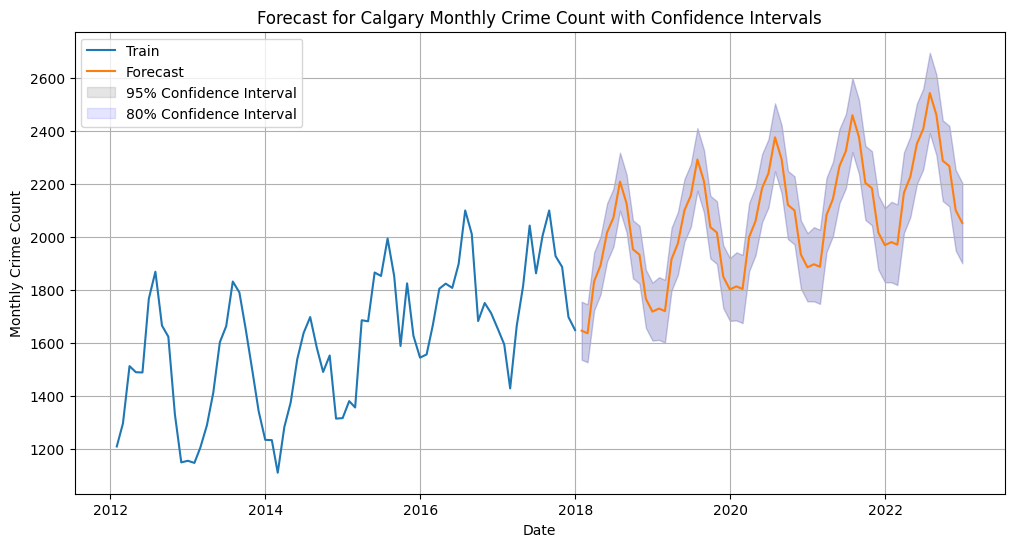

In [36]:
# Forecast Function using Linear Regression with Trend and Seasonality
def forecast_linear_trend_seasonality(train, steps):
    # Extract date index and create trend and seasonality components
    dates = train.index
    dp = DeterministicProcess(index=dates,
                              constant=True,  # Adds intercept
                              order=1,        # Linear trend (order 1)
                              seasonal=True,  # Adds seasonal effects
                              drop=True)      # Removes the original date column
    X = dp.in_sample()  # In-sample data
    y = train['Crime Count']
    
    # Fit the linear regression model
    model = OLS(y, X).fit()
    
    # Generate forecasts
    X_fore = dp.out_of_sample(steps=steps)  # Out-of-sample data for prediction
    forecast = model.get_prediction(X_fore)
    
    # Return the forecast and confidence intervals
    forecast_mean = forecast.predicted_mean
    forecast_ci = forecast.conf_int()
    
    return forecast_mean, forecast_ci

# Generate forecasts for 2020
forecast_mean, forecast_ci = forecast_linear_trend_seasonality(train, steps)

# Create a DataFrame to display forecasts and confidence intervals
forecast_dates = pd.date_range(start='2018-01-01', periods=steps, freq='M')
forecast_df = pd.DataFrame({
    'Date': forecast_dates,
    'Point Forecast': forecast_mean,
    'Lo 80': forecast_ci[:, 0],
    'Hi 80': forecast_ci[:, 1],
    'Lo 95': forecast_ci[:, 0],  # Adjust confidence levels if necessary
    'Hi 95': forecast_ci[:, 1]
})

forecast_df.set_index('Date', inplace=True)

# Display forecasts and confidence intervals
print("Future Forecasts with Confidence Intervals for 2020:")
print(forecast_df)

# Plot forecasts and confidence intervals
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Crime Count'], label='Train')
plt.plot(forecast_df.index, forecast_df['Point Forecast'], label='Forecast')
plt.fill_between(forecast_df.index, forecast_df['Lo 95'], forecast_df['Hi 95'], color='k', alpha=0.1, label='95% Confidence Interval')
plt.fill_between(forecast_df.index, forecast_df['Lo 80'], forecast_df['Hi 80'], color='b', alpha=0.1, label='80% Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Monthly Crime Count')
plt.title('Forecast for Calgary Monthly Crime Count with Confidence Intervals')
plt.legend()
plt.grid(True)
plt.show()


In [37]:
steps = 60
# Generate forecasts for 2020
forecast_mean, forecast_ci = forecast_linear_trend_seasonality(train, steps)

# Create a DataFrame to display forecasts and confidence intervals
forecast_dates = pd.date_range(start='2018-01-01', periods=steps, freq='M')
forecast_df = pd.DataFrame({
    'Date': forecast_dates,
    'Point Forecast': forecast_mean,
})

forecast_df.set_index('Date', inplace=True)

# Display forecasts and confidence intervals
print("Future Forecasts:")
print(forecast_df)


Future Forecasts:
            Point Forecast
Date                      
2018-01-31     1645.550000
2018-02-28     1635.716667
2018-03-31     1831.716667
2018-04-30     1891.383333
2018-05-31     2016.050000
2018-06-30     2071.883333
2018-07-31     2207.716667
2018-08-31     2125.383333
2018-09-30     1952.550000
2018-10-31     1932.050000
2018-11-30     1765.716667
2018-12-31     1717.550000
2019-01-31     1729.088095
2019-02-28     1719.254762
2019-03-31     1915.254762
2019-04-30     1974.921429
2019-05-31     2099.588095
2019-06-30     2155.421429
2019-07-31     2291.254762
2019-08-31     2208.921429
2019-09-30     2036.088095
2019-10-31     2015.588095
2019-11-30     1849.254762
2019-12-31     1801.088095
2020-01-31     1812.626190
2020-02-29     1802.792857
2020-03-31     1998.792857
2020-04-30     2058.459524
2020-05-31     2183.126190
2020-06-30     2238.959524
2020-07-31     2374.792857
2020-08-31     2292.459524
2020-09-30     2119.626190
2020-10-31     2099.126190
2020-11-30